In [1]:
%%time
import modin.pandas as pd
import pandas as pdnm
import matplotlib.pyplot as plt
import time
from sklearn.manifold import TSNE as sTSNE
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

Wall time: 42 s


In [7]:
%time
df = pd.read_csv('../2017_a3.csv')

Wall time: 0 ns


In [8]:
df['rdata']=df['rdata'].str.split('/')

In [9]:
dtest = df[['q_name','rdata']]

In [10]:
def tbyt(lis):
    for i in range(0,len(lis)):
        lis[i]=lis[i].split('.')[0]
    return lis

In [11]:
dtest

,q_name,rdata
0,mailstore1.srv.fundp.ac.be,[138.48.4.212]
1,www.apple.com,[23.206.34.3]
2,www.google.com,[216.58.207.132]
3,eur.clientlogportal.office.akadns.net,[94.245.88.28]
4,eur.clientlogportal.office.akadns.net,[2a01.0111.f100.a000.0000.0000.5ef5.581c]
...,...,...
4971833,i.ytimg.com,"[172.217.23.14, 216.58.204.46, 216.58.198.174,..."
4971834,r6---sn-cxab5jvh-cg0r.googlevideo.com,[194.78.0.209]
4971835,yt3.ggpht.com,[216.58.201.33]
4971836,noe.fundp.ac.be,[138.48.4.185]


In [12]:
%%time

#dtest = df[['q_name','rdata']]
dtest['rdata'] = dtest['rdata'].dropna().apply(lambda x: tbyt(x))

Wall time: 2min 19s


In [13]:
%%time
dtests = dtest.groupby('q_name').agg('sum')

Wall time: 1h 17min 11s


In [14]:
%%time
dtestc = dtests['rdata'].apply(lambda x: len(set(x)))
#dtestcdic = dtestc.to_dict()
#df['rdatacount']=df['q_name']
#df = df.replace({'rdatacount':dtestcdic}).replace({'rdatacount':r"^.*\..*$"},{'rdatacount':0},regex=True)

#display(df)

Wall time: 64.8 ms


In [16]:
dtestc.sort_values()

q_name
0-courier.push.apple.com                                                        1
p4-d2nqz2jqnwmqu-a7yytqg5tivfmggd-if-v6exp3-v4.metric.gstatic.com               1
p4-d6lcfb3vcgz3o-a6mtrshqzstjxzpi-350716-i1.anycast2-stb.metric.gstatic.com     1
p4-d6lcfb3vcgz3o-a6mtrshqzstjxzpi-350716-i2.unicast2-stb.metric.gstatic.com     1
p4-d6lcfb3vcgz3o-a6mtrshqzstjxzpi-if-v6exp3-v4.metric.gstatic.com               1
                                                                               ..
db.be.clamav.net                                                               15
us.pool.ntp.org                                                                16
de.pool.ntp.org                                                                18
north-america.pool.ntp.org                                                     22
asia.pool.ntp.org                                                              30
Name: rdata, Length: 68309, dtype: int64

In [ ]:
dtests.to_csv('../rdata.csv')

In [17]:
dtestc.to_csv('../rdatacounts_first_byte.csv')

To request implementation, send an email to feature_requests@modin.org.


In [63]:
rdatacounts = pd.read_csv('../rdatacounts.csv').set_index('q_name')
rdatacountsdic = rdatacounts['0'].to_dict()

In [30]:
%%time
df['rdatacount'] = df['q_name'].map(rdatacountsdic)

Wall time: 156 ms


In [31]:
df.fillna({'rdatacount':0}, inplace=True)

In [34]:
df.fillna({'rdatacount_first_byte':0}, inplace=True)

In [32]:
df.fillna({'ttl':1}, inplace=True)

In [ ]:
df.dropna(inplace=True,subset=['q_name'])

In [8]:
whitelist3  = [
                'sophosxl.net',
                'fundp.ac.be',
                'unamur.be',
                'facebook.com',
                'google.com',
                'apple.com',
                'google.be',
                'fbcdn.net',
                'icloud.com',
                'gstatic.com',
                'youtube.com',
                'akamai.net',
                'discordapp.io',
                'outlook.com',
                'office.com',
                'dropbox.com',
                'live.com',
                'microsoft.com',
                'doubleclick.com',
                'office365.com',
                'twitter.com',
                'googleapis.com',
                'google-analytics.com',
                'akamaiedge.net',
                'googlesyndication.com',
                'akamaiedge.net',
                'doubleclick.net',
                'ytimg.com',
                'firefox.com',
                'facebook.net',
                'snapchat.com',
                'googleadservices.com',
                'akadns.net',
                'fbsbx.com',
                'digicert.com',
                'tmall.com',
                'qq.com',
                'baidu.com',
                'sohu.com',
                'login.tmall.com',
                'taobao.com',
                'jd.com',
                'yahoo.com',
                'wikipedia.org',
                'amazon.com',
                'sina.com.cn',
                'pages.tmall.com',
                'weibo.com',
                'zoom.us',
                'reddit.com',
                'netflix.com',
                'vk.com',
                'xinhuanet.com',
                'okezone.com',
                'csdn.net',
                'instagram.com',
                'alipay.com',
                'blogspot.com',
                'yahoo.co.jp',
                'twitch.tv',
                'myshopify.com',
                'bongacams.com',
                'google.com.hk',
                'bing.com',
                'microsoftonline.com',
                'tribunnews.com',
                'aliexpress.com',
                'stackoverflow.com',
                'naver.com',
                'panda.tv',
                'zhanqi.tv',
                'livejasmin.com',
                'babytree.com',
                'tianya.cn',
                'ebay.com',
                'amazon.co.jp',
                'google.co.in',
                'chaturbate.com']

for i in range(0,len(whitelist3)):
    whitelist3[i] = '(^|\.)'+whitelist3[i]+'$'

In [ ]:
df['name_len'] = df['q_name'].str.len()

In [ ]:
df['name_lvl']=df['q_name'].str.count('\.')+1

In [9]:
%time
df['known']= df['q_name'].str.lower().str.contains('|'.join(whitelist3)).astype(int)

Wall time: 0 ns


In [ ]:
types = df['q_type'].unique()

In [ ]:
dic = {}
i=0
for t in types:
    dic[t] = i
    i+=1

In [ ]:
df['typecode'] = df['q_type'].map(dic)

In [ ]:
%%time
df['idcount'] = df.groupby('identifier')['q_type'].transform('count')

In [ ]:
df['s_acount'] = df.groupby('s_addr')['q_type'].transform('count')

In [ ]:
df['ttl_log']=np.log(df['ttl'])

In [ ]:
df['ttl_log'] = df['ttl_log'].where(df['ttl_log']>=0,0)

In [4]:
rdatacounts_fb = pd.read_csv('../rdatacounts_first_byte.csv').set_index('q_name')
rdatacountsdic_fb = rdatacounts_fb['rdata'].to_dict()

To request implementation, send an email to feature_requests@modin.org.


In [5]:
%%time
df['rdatacount_first_byte'] = df['q_name'].map(rdatacountsdic_fb)

Wall time: 140 ms


In [6]:
df.fillna({'rdatacount_first_byte':0}, inplace=True)

In [42]:
df.to_csv("../2017_a4.csv",index=False)

In [28]:
df.fillna({'rdata':""},inplace=True)

In [2]:
df = pd.read_csv("../2017_a4.csv")

In [29]:
dfs = df.head(10000)

In [34]:
def lnl(x):
    s=x.split(".")
    if(len(s)>1):
        return len(s[-2])
    else:
        return 0

In [35]:
lnl("www.google.com")

6

In [38]:
df['last_name_len'] = df['q_name'].dropna().apply(lnl)

In [41]:
df[['last_name_len','q_name']].sort_values('last_name_len')

,last_name_len,q_name
2877136,0,local
2054129,0,local
3670673,0,local
3670707,0,local
3670708,0,local
...,...,...
4555661,47,www.chirurgie-esthetique-tunisie-sans-intermed...
4555651,47,www.chirurgie-esthetique-tunisie-sans-intermed...
4679567,49,www.revue-critique-de-fixxion-francaise-contem...
4679557,49,www.revue-critique-de-fixxion-francaise-contem...


In [ ]:
dd = df[['ttl_log','s_acount','rdatacount_fb','idcount','typecode','known','name_len','name_lvl','aa_flag','tc_flag','rd_flag','ra_flag','rcode','answers_count','authority_count','additional_count']]

In [45]:
dd = df[(df['typecode']==0) | (df['typecode']==1)]
dd = df[['ttl_log','s_acount','rdatacount_first_byte','idcount','known','name_len','name_lvl','last_name_len']]

In [ ]:
dd = dd[(dd['typecode']==0) | (dd['typecode']==1)]

In [46]:
sample = dd.sample(n=1000)

In [52]:
sample = dd

In [ ]:
std = StandardScaler().fit_transform(sample.values)

In [ ]:
rob = RobustScaler().fit_transform(sample.values)

In [53]:
minmax = MinMaxScaler().fit_transform(sample.values)

In [54]:
#weights
#'ttl_log','s_acount','rdatacount_first_byte','idcount','known','name_len','name_lvl','last_name_len'
w = np.array([
    3,
    2,
    6,
    3,
    6,
    3,
    3,
    6,
])

In [ ]:
#weights
#'ttl_log','s_acount','rdatacount','idcount','typecode','known','name_len','name_lvl','aa_flag','tc_flag','rd_flag','ra_flag','rcode','answers_count','authority_count','additional_count'
w = np.array([
    5,
    5,
    6,
    3,
    1,
    6,
    4,
    3,
    1,
    1,
    1,
    1,
    1,
    3,
    1,
    1,
])

In [ ]:
wstd = std*w

In [ ]:
wrob = rob*w

In [55]:
wminmax = minmax*w

In [ ]:
kmeanstd = KMeans(n_clusters=5,random_state=1).fit(wstd)

In [ ]:
kmeanrob = KMeans(n_clusters=5,random_state=1).fit(wrob)

In [56]:
kmeanminmax = KMeans(n_clusters=5,random_state=1).fit(wminmax)

In [57]:
dd.to_csv('temp.csv',index=0)

In [58]:
ddc = pdnm.read_csv('temp.csv')

In [59]:
ddc['cluster'] = pdnm.Series(kmeanminmax.labels_, index=ddc.index)

In [60]:
ddc.groupby('cluster').mean()

,ttl_log,s_acount,rdatacount_first_byte,idcount,known,name_len,name_lvl,last_name_len
cluster,,,,,,,,
0,11.331113,1.087859e+06,1.002139,76.820147,1.0,15.091913,4.004708,2.018128
1,4.116318,2.276346e+05,1.150648,90.084988,0.0,23.675219,4.021500,7.865122
2,2.774262,1.649955e+05,1.286100,77.456882,1.0,23.551704,4.535450,5.471062
3,3.282407,3.564084e+05,0.000000,105.167282,1.0,218.001042,10.411485,7.999856
4,11.525999,1.524456e+05,1.017459,76.858774,1.0,19.826696,4.234658,2.508840


In [61]:
ddc[ddc['cluster']==1]

,ttl_log,s_acount,rdatacount_first_byte,idcount,known,name_len,name_lvl,last_name_len,cluster
13,2.197225,4696,2.0,81,0,14,3,7,1
29,6.396930,707279,1.0,62,0,17,3,5,1
31,7.855157,854,1.0,64,0,20,5,6,1
39,3.258097,7033,3.0,67,0,15,3,4,1
42,3.258097,7033,3.0,76,0,49,5,9,1
...,...,...,...,...,...,...,...,...,...
4970237,2.995732,3614,1.0,83,0,21,3,13,1
4970240,11.366743,38062,0.0,75,0,25,6,7,1
4970246,6.261492,3614,1.0,85,0,21,3,13,1
4970254,4.969813,1587,1.0,82,0,37,3,11,1


In [ ]:

plt.figure(figsize=(20,10))
plt.plot(dd['q_type'].values, dd['name_len'].values, '.',markersize=3)

In [ ]:
%%time
#ts = tsne.tsne(std[:1000],perplexity=60)
ts = sTSNE(perplexity=30).fit_transform(std)
plt.figure(figsize=(20,10))
plt.scatter(ts[:,0],ts[:,1], c=kmeanstd.labels_,cmap='viridis')

plt.savefig('../tsne30-std-rdatacount_w.png')

In [ ]:
start = time.time()
#ts = tsne.tsne(rob[:1000],perplexity=60)
ts = sTSNE(perplexity=30).fit_transform(rob[:1000])
end = time.time()
print(end-start)
plt.figure(figsize=(20,10))
plt.scatter(ts[:,0],ts[:,1], c=kmeanrob.labels_,cmap='viridis')
plt.savefig('../tsne30-rob-rdatacount_w.png')

7.898308038711548


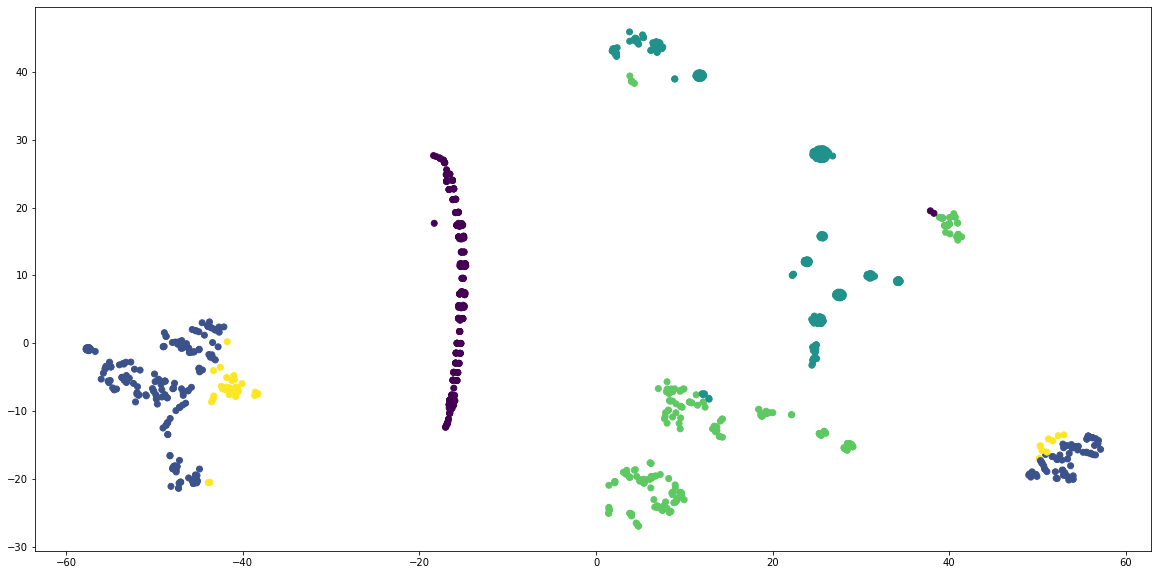

In [51]:
start = time.time()
#ts = tsne.tsne(minmax[:1000],perplexity=60)
ts = sTSNE(perplexity=30).fit_transform(minmax[:1000])
end = time.time()
print(end-start)
plt.figure(figsize=(20,10))
plt.scatter(ts[:,0],ts[:,1], c=kmeanminmax.labels_,cmap='viridis')
plt.savefig('../tsne30-minmax-rdatacount_fb_lastname_w.png')